# Multivariate Exploration of data

## Non-Positional Encodings for Third Variables
Three main non-positional encodings stand out: shape, size, and colo
## Encoding via Shape
Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable.

Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. 

Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

`cat_markers = [['A', 'o'],
               ['B', 's']]`

`for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
plt.legend(['A','B'])`

The `o` string specifies **circular** markers for members of category `A`, 

while the `s` string specifies **square** markers for members of category `B`. 

 If we wanted the points to have the same color as well, we could do that through the `c` parameter in scatter or `color` in regplot.

## Encoding via Size
Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the `s` parameter in `scatter`.

(We need to refer to `s` through a dictionary assigned to the `scatter_kws` parameter when working with `regplot`, and assign the full series rather that just the col name)

While the creation of the plot is easier with size, simple as this:

`plt.scatter(data = df, x = 'num_var1', y = 'num_var2', s = 'num_var3')`

 we need to put in extra leg work to create a legend!
 
 Dummy series for adding legend:

`sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []`

`for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))`

`plt.legend(legend_obj, sizes)` # the list of plotting objects to depict in the legend, and their labels.

**Size** is much **less precise** an encoding than **position**, so it is better used to make general, qualitative judgments than precise judgments. Also, we might need to apply a scaling factor (e.g., multiplying or dividing all values by 2) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

## A Warning on Combining Encodings
- One surface issue is that the code to depict the plot and a reasonable legend gets complicated. 
- A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

`plt.figure(figsize = [5,5])`

`common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)`

### a little bit of aesthetic cleaning
`plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])`

Despite having the same "s" values, the triangle `'^`, circle`'o'`, and X`'x'` markers all look smaller (have a smaller area) than the `'S'`square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider;)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

In [4]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0],200,replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

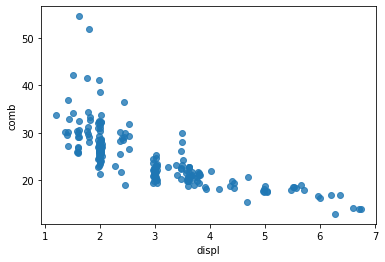

In [5]:
sb.regplot(data=fuel_econ_subset,x='displ',y='comb',x_jitter=0.04,fit_reg=False);

## Third variable: `trans_type`  : Shape

#### make a list of list / dictionary of markers for each category
However, list of list is better to control the order in which the levels are plotted

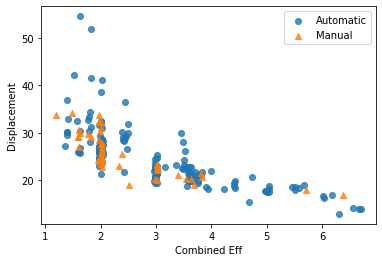

In [6]:
markers = [['Automatic','o'],
           ['Manual','^']]
for cat,marker in markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']==cat]
    sb.regplot(data=plot_data,x='displ',y='comb',x_jitter=0.04,
               fit_reg=False,marker = marker);
plt.ylabel('Displacement')
plt.xlabel('Combined Eff')
plt.legend(['Automatic','Manual']);

## Third variable: `Co2` : Size

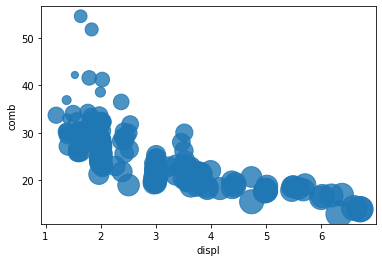

In [7]:
sb.regplot(data=fuel_econ_subset,x='displ',y='comb',x_jitter=0.04,
           fit_reg=False,scatter_kws={'s': fuel_econ_subset['co2']});

Reduce the marker size to see more of the points

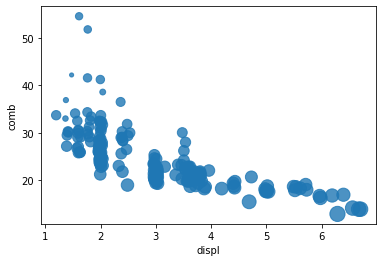

In [8]:
sb.regplot(data=fuel_econ_subset,x='displ',y='comb',x_jitter=0.04,
           fit_reg=False,scatter_kws={'s': fuel_econ_subset['co2']/3});

It looks like as the engine size increases, there is a high level of co2 mission. And the less fuel comb eff cars also tends to have higher co2 mission; even at smaller ingine sizes. Lets have legend as well.

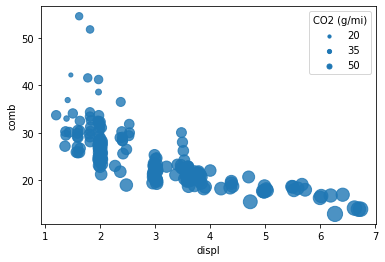

In [9]:
sb.regplot(data=fuel_econ_subset,x='displ',y='comb',x_jitter=0.04,
           fit_reg=False,scatter_kws={'s': fuel_econ_subset['co2']/3});

sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []

for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/2, color = base_color))

plt.legend(legend_obj, sizes,title='CO2 (g/mi)'); #if one parameter; it is labels(sizes)

# Color Palettes

Color is a very common encoding for variables, for both qualitative and quantitative variables. If we have a **qualitative variable**, we can set different colors for different levels of a categorical variable through the `hue` parameter on seaborn's `FacetGrid` class.

/Users/tamimisu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


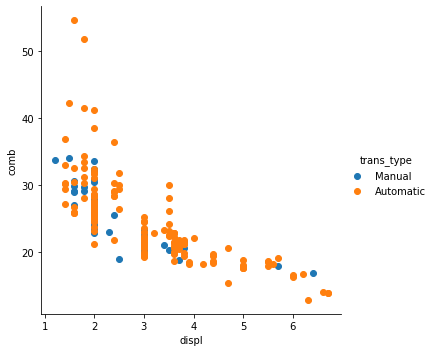

In [10]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', size = 5)
g.map(plt.scatter, 'displ', 'comb')
g.add_legend();

For **quantitative variables**, we should not take the same approach, since `FacetGrid` expects any variable input for subsetting to be categorical.

Instead, we can set **color** based on numeric value in the `scatter` function through the `c` parameter, much like how we set up marker **sizes** through `s`.

(Unlike with **size**, we don't have an easy way of setting **color** by numeric value through `regplot` due to how its `color` argument is set up.)

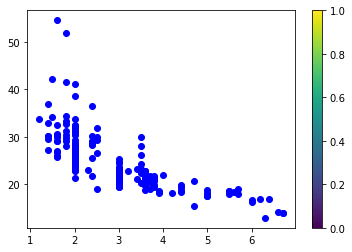

In [11]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'blue')
plt.colorbar();

Compared to the `size encoding`, we have a **more precise** idea of value on the third variable, though certainly **not as precise as** `positional encodings`.

# Color Palettes
There are three major classes of color palette to consider: qualitative, sequential, and diverging.

## Selecting Color Palettes

If we want to **change the color map for our plot**, the easiest way of doing so is by using one of the **built-ins from Matplotlib or Seaborn**.

Seaborn also adds in a number of its own palettes:

- Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- Sequential: `rocket` (white-orange-red-purple-black), `mako` (mint-green-blue-purple-black)
- Diverging: `vlag` (blue-white-red), `icefire` (blue-black-orange)

For all of these strings, appending `_r` reverses the palette, which is useful if a **sequential** or **diverging palette** is rendered counter to your expectations.

### Qualitative palettes are built for nominal-type data.
This is the palette class taken by the default palette. (no inherent ordering)

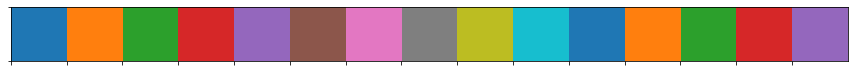

In [12]:
sb.palplot(sb.color_palette(n_colors=15)) #n_colors= any number. 10 is default

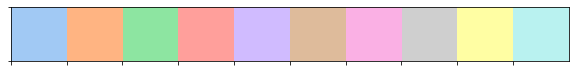

In [13]:
# Qualitative
sb.palplot(sb.color_palette('pastel')) 
# other options: 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. 

### In a sequential palette, consecutive color values should follow each other systematically. 
Typically, this follows a light-to-dark trend across a single or small range of hues, where **light** colors indicate **low** values and **dark** colors indicate **high** values. However,  the default sequential color map, `viridis`, takes the **opposite** approach, with **dark** colors indicating **low** values, and **light** values indicating **high**.

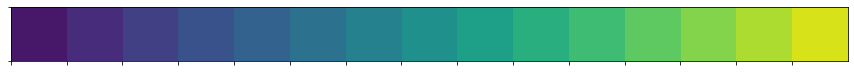

In [14]:
# Sequential
sb.palplot(sb.color_palette('viridis', 15))
# other options: rocket (white-orange-red-purple-black)
# or mako (mint-green-blue-purple-black) 
# and viridis

### Diverging palette
Most of the time, a **sequential palette** will depict ordinal or numeric data just fine. However, if there is a meaningful **zero or center value** for the variable, you may want to consider using a **diverging palette**.

In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

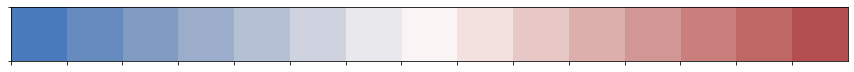

In [15]:
sb.palplot(sb.color_palette('vlag', 15))
# vlag (blue-white-red)
# icefire (blue-black-orange)

A color palette can be set in `FacetGrid` through the `palette` parameter, and in `scatter` through the `cmap` parameter.

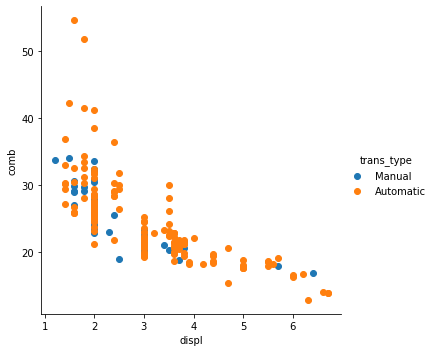

In [16]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', size = 5) 
g.map(plt.scatter, 'displ', 'comb')#here
g.add_legend();

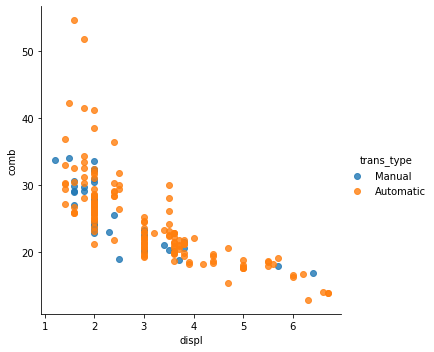

In [17]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', size = 5) 
g.map(sb.regplot, 'displ', 'comb',fit_reg=False)#here another method
g.add_legend();

Suppose we want to change the order in which points are plotted; manual over automatic. We can do so by setting the `hye_order` parameter the desired order like below:

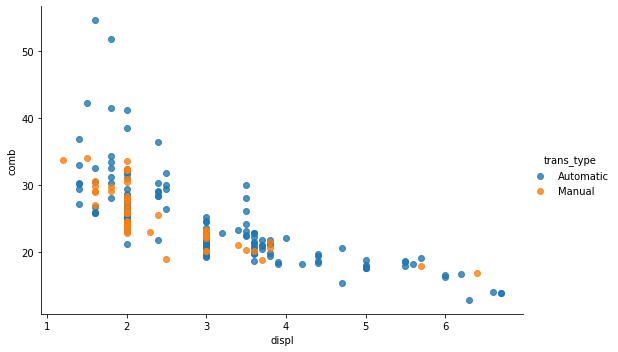

In [18]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', size = 5, aspect = 1.5,
                hue_order=['Automatic','Manual']) 
#1.5 means 50% taller than original
g.map(sb.regplot, 'displ', 'comb',fit_reg=False)
g.add_legend();

Because `trans_type` is nominal type variable, default qualitative pallete works good. What if we want to plot `VClass` ? 

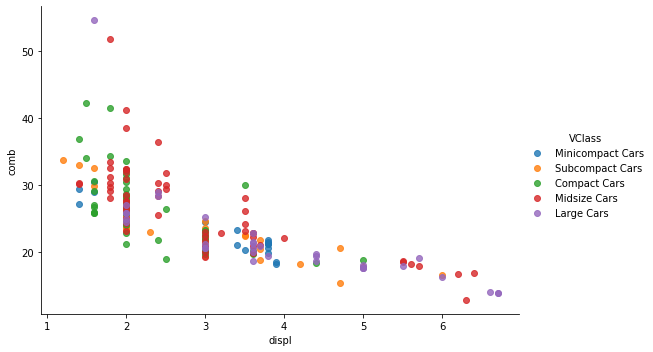

In [19]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass', size = 5, aspect = 1.5) 
#1.5 means 50% taller than original
g.map(sb.regplot, 'displ', 'comb',fit_reg=False)
g.add_legend();

`VClass` is ordered variable, so we should specify a **sequential variable instead**. This can be done through `pallete` parameter.

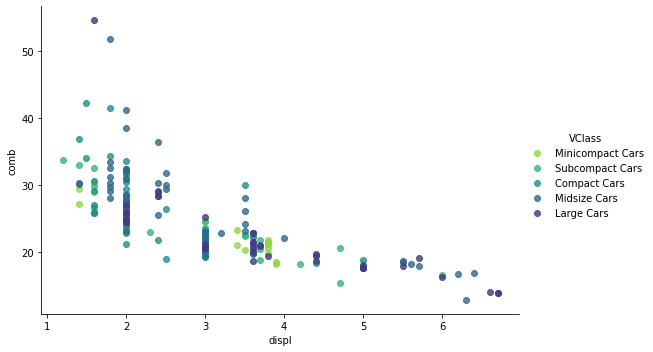

In [20]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass', size = 5, aspect = 1.5,
                palette = 'viridis_r') 
#1.5 means 50% taller than original
g.map(sb.regplot, 'displ', 'comb',fit_reg=False)
g.add_legend();

What if we want to plot numerical variable like `co2` ? we will **not** use `hue`, since it only expect categorical variables. 

We will use basic `scatter` plot. Altough we will lose `jitter` in this case, but there is an interaction in the `color` parameter in `regplot` that make the coloring by value, hard to do.

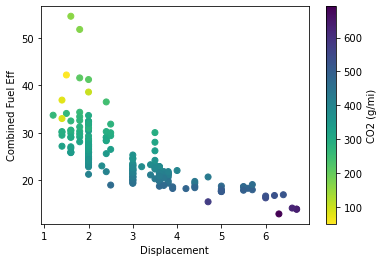

In [21]:
#only for numeric
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c='co2',cmap = 'viridis_r') 
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff');

## Note: Diverging color palette
When using a **diverging color palette**, we will likely need to specify the `vmin` and `vmax` parameters in order to have the **neutral point** in the palette meet the **center point** in the scale. Alternatively, solutions that create a different normalization function for finer control over the color map. Like below code:

<ipython-input-22-0d49e268c24c>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  im = ax.imshow(data, norm=DivergingNorm(0), cmap=plt.cm.seismic, interpolation='none')


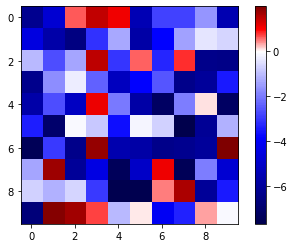

In [22]:
from matplotlib.colors import DivergingNorm

data = np.random.random((10,10))
data = 10 * (data - 0.8)

fig, ax = plt.subplots()
im = ax.imshow(data, norm=DivergingNorm(0), cmap=plt.cm.seismic, interpolation='none')
fig.colorbar(im)
plt.show()

Diverging color scales are common enough for the `heatmap` type that there is a `center` parameter for setting the central value.

# Warnings on Color
- First of all, try and consider color blindness when selecting color for your plots. 
( 8% of the population have some kind of color vision deficiency). If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness sim.
- Secondly, you want to be aware of the effect of transparency and overlap on interpretability.
If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data.

To be safe here, **avoid or minimize transparency** in plots with color. 
You may need to **plot only a sample** of your points in order to make sure that the **effect of the third variable is clearly visible**.
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

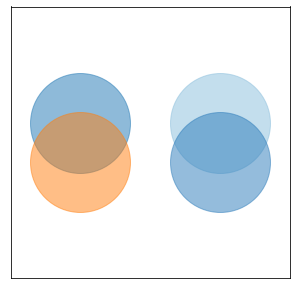

In [23]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sb.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sb.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sb.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sb.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([]);

## pokemon practice

In [25]:
pokemon = pd.read_csv('pokemon.csv')

## If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed?

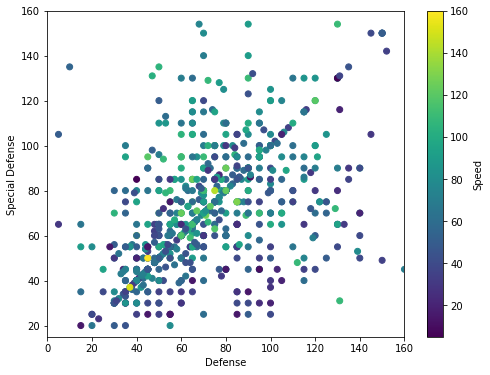

In [27]:
plt.figure(figsize = [8,6])
plt.scatter(data=pokemon,x='defense',y='special-defense',c='speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.colorbar(label = 'Speed');

## How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon?

In [28]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

In [29]:
# subset
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

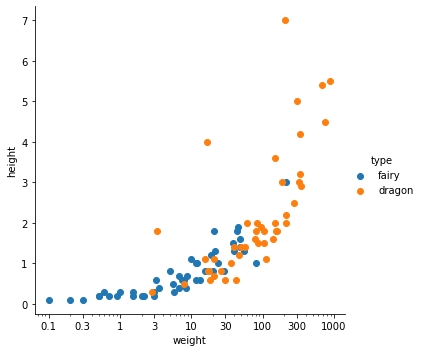

In [30]:
#plot and scale
g = sb.FacetGrid(data=pokemon_sub,hue='type',size=5)
g.map(plt.scatter,'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

g.add_legend();